## 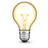课前回顾

### 1.1 了解什么是大模型
- LLM的定义：是指具有大规模参数和复杂计算结构的机器学习模型。这些模型通常由深度神经网络构建而成，有数十亿甚至数千亿个参数。
- LLM的发展历程：Google的T5、Openai的GPT系列、Meta的Llama、百度的文心、华为的盘古、腾讯、字节等......
- LLM的基本原理架构：一个基本架构和三种搭建形式
- LLM的特点总结：八大特点

### 1.2 探索大模型能力边界
- 论文写作、代码编程、数据处理、数据生成、社交媒体、智能体操控等
- 讨论了LLM和通用人工智能的联系与暂时的区别、实现通用人工智能的可能性

### 1.3 大模型生成答案的原理
- 由浅入深
- 3D可视化理解

### 1.4 大模型应用开发的核心
- 2个重要认知
- 传统AI应用开发和LLM应用开发的区别
- 开发流程分解
- 项目架构案例简析 （也是2024-02-01 19:59:14 实战课程作业的要求）
- 分析了当下LLM应用的主流技术架构类型（纯Prompt、基于FunctionCalling的、基于RAG的、基于微调的...）

### 1.5 初次调用OpenAl
- 这个相信大家都自己尝试了

- 上节课补充内容：OpenAI API 的几个重要参数！


In [30]:
'''def get_chat_completion(session, user_prompt, model="gpt-3.5-turbo"):
    _session = copy.deepcopy(session)
    _session.append({"role": "user", "content": user_prompt})
    response = client.chat.completions.create(
        model=model,
        messages=_session,
        # 以下默认值都是官方默认值
        temperature=1,          # 生成结果的多样性 0~2之间，越大越随机，越小越固定
        seed=None,              # 随机数种子。指定具体值后，temperature 为 0 时，每次生成的结果都一样
        stream=False,           # 数据流模式，一个字一个字地接收
        top_p=1,                # 随机采样时，只考虑概率前百分之多少的 token。不建议和 temperature 一起使用
        n=1,                    # 一次返回 n 条结果
        max_tokens=100,         # 每条结果最多几个 token（超过截断）
        presence_penalty=0,     # 对出现过的 token 的概率进行降权
        frequency_penalty=0,    # 对出现过的 token 根据其出现过的频次，对其的概率进行降权
        logit_bias={},          # 对指定 token 的采样概率手工加/降权，不常用
    )
    msg = response.choices[0].message.content
    return msg'''

'def get_chat_completion(session, user_prompt, model="gpt-3.5-turbo"):\n    _session = copy.deepcopy(session)\n    _session.append({"role": "user", "content": user_prompt})\n    response = client.chat.completions.create(\n        model=model,\n        messages=_session,\n        # 以下默认值都是官方默认值\n        temperature=1,          # 生成结果的多样性 0~2之间，越大越随机，越小越固定\n        seed=None,              # 随机数种子。指定具体值后，temperature 为 0 时，每次生成的结果都一样\n        stream=False,           # 数据流模式，一个字一个字地接收\n        top_p=1,                # 随机采样时，只考虑概率前百分之多少的 token。不建议和 temperature 一起使用\n        n=1,                    # 一次返回 n 条结果\n        max_tokens=100,         # 每条结果最多几个 token（超过截断）\n        presence_penalty=0,     # 对出现过的 token 的概率进行降权\n        frequency_penalty=0,    # 对出现过的 token 根据其出现过的频次，对其的概率进行降权\n        logit_bias={},          # 对指定 token 的采样概率手工加/降权，不常用\n    )\n    msg = response.choices[0].message.content\n    return msg'

<div class="alert alert-success">
<b>划重点：</b>
<ul>
<li>Temperature 参数很关键</li>
<li>执行任务用 0，文本生成用 0.7-0.9</li>
<li>无特殊需要，不建议超过 1</li>
</ul>
</div>


## 本节内容

### Prompt工程——Prompt设计的好坏，决定了你Agent能力能否达到LLM的上限

- 2.1 什么是Prompt Engineering
- 2.2 Prompt 的内容架构
- 2.3 基于Prompt的智能客服案例
- 2.4 Prompt技能进阶
- 2.5 Prompt攻防


### 课后作业

- 分组情况确定
- 课后小作业：了解更前沿的Prompt方案——Prompt Tuning
- LLM操控无人机案例复现+语音识别功能


### Function Calling——LLM和外部世界链接

- 3.1 Tool Calling 的机制
- 3.2 简单示例
- 3.3 支持Tool Calling国产LLMs
- 3.4 Tool Calling 的想象空间

开始吧
-------------------
### 2.1 什么是提示工程（Prompt Engineering）

提示工程也叫「指令工程」。

- Prompt 就是你发给大模型的指令。
- 貌似简单，但意义非凡。
  - 「Prompt」 是 AGI 时代的「编程语言」
  - 「Prompt 工程」是 AGI 时代的「软件工程」
  - 「提示工程师」是 AGI 时代的「程序员」
- 学会提示工程，就像学用鼠标、键盘一样，是 AGI 时代的基本技能
- 提示工程也是「门槛低，天花板高」，所以有人戏称 prompt 为「咒语」
- 但专门的「提示工程师」不会长久，因为每个人都要会「提示工程」，AI 的进化也会让提示工程越来越简单

<div class="alert alert-warning">
<b>思考1：</b>既然门槛低，每个人都会，那我们还有必要深入了解Prompt吗，我们的优势是什么？
    
💡可以从原理、编程、专业领域角度去思考
</div>

Prompt Engineering的目的

1. 针对具体问题提问，获得具体结果
2. **固化一套 Prompt 到程序中，成为系统功能的一部分**，比如「每天生成本公司的简报」「AI 客服系统」「基于公司知识库的问答」

前者主要通过 ChatGPT、ChatBox 这样的界面操作，还有很多现成的LLM产品。

后者则需要写代码了，将Prompt灵活地嵌入到代码中（系统中）。



### 2.2 Prompt 的内容架构

- **角色**：给 AI 定义一个最匹配任务的角色。比如：「你是一位XX专家」，**角色定义会使得效果会好很多**
- **具体指令**：对任务进行描述
- **上下文**：给出与任务相关的其它背景信息（尤其在多轮交互中）
- **例子**：必要时给出举例，即one-shot, few（Three、Five）-shot learning等；实践证明其对输出结果的正确性有很大帮助
- **输入**：任务的输入信息；在提示词中明确的标识出输入
- **输出**：输出的格式描述，以便后继模块自动解析模型的输出结果，比如（JSON、XML）

<div class="alert alert-warning">
<b>思考2：</b>为什么给出角色定义会使效果好很多？
</div>

![lost-in-the-middle](./lost_middle.jpg)
- 论文连接[Lost in the Middle: How Language Models Use Long Contexts](https://arxiv.org/abs/2307.03172)
<div class="alert alert-success">
由上图可见！大模型对 **上下文的开头和结尾** 更敏感。
预定义角色的本质，其实就是把问题域收窄。
</div>




### 2.3 Demo-推荐流量包的智能客服

现有某运营商的流量包产品如下：

|   名称   | 流量（G/月） | 价格（元/月） | 适用人群 |
| :------: | -----------: | ------------: | :------: |
| 经济套餐 |           10 |            50 |  无限制  |
| 畅游套餐 |          100 |           180 |  无限制  |
| 无限套餐 |         1000 |           300 |  无限制  |
| 校园套餐 |          200 |           150 |  在校生  |

功能需求：设计的智能客服可以根据用户的咨询，推荐最适合的流量包。


In [40]:
# 导入依赖库
from openai import OpenAI
# !pip install --upgrade openai
# windows在系统环境中创建Key变量,如果print不出来 可以重启再试
import os

# 初始化 OpenAI 客户端
openai_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(
    base_url='https://api.openai-proxy.org/v1',
    api_key=openai_api_key,
)




In [41]:
# 基于 prompt 生成文本
def get_completion(prompt, model="gpt-3.5-turbo"):      # 默认使用 gpt-3.5-turbo 模型
    messages = [{"role": "user", "content": prompt}]    # 将 prompt 作为用户输入
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0,                                  # 模型输出的随机性，0 表示随机性最小
    )
    return response.choices[0].message.content          # 返回模型生成的文本

In [42]:
#### 定义任务描述和输入
# 测试LLM
# 任务描述
instruction = """
你的任务是识别用户对手机流量套餐产品的选择条件。
每种流量套餐产品包含三个属性：名称，月费价格，月流量。
根据用户输入，识别用户在上述三种属性上的倾向。
"""

# 用户输入
input_text = """
办个100G的套餐。
"""

# prompt 模版。instruction 和 input_text 会被替换为上面的内容
prompt = f"""
{instruction}

用户输入：
{input_text}
"""

# 调用大模型
response = get_completion(prompt)
print(response)

用户在流量套餐产品的选择条件上的倾向为：
- 名称：用户倾向选择100G的套餐。
- 月费价格：用户未提及对月费价格的倾向。
- 月流量：用户倾向选择100G的套餐。


In [43]:
# 从上面的结果可以看出 LLM 理解了我们的需求。
# 但是自然语言的输出，不方便我们形成最终的决策。

# 因此我们需要对输出的格式进行约定，形成格式化的输出，**推荐使用 JSON 格式输出**

# 输出格式限定
output_format = """
以 JSON 格式输出
"""

# 加入输出格式
prompt = f"""
{instruction}

{output_format}

用户输入：
{input_text}
"""

# 调用大模型
response = get_completion(prompt)
print(response)

{
  "名称": "100G套餐",
  "月费价格": "未知",
  "月流量": "100G"
}


GPT3.5\4等大模型是经过code资料训练过的，所以对对 JSON 格式的信息是有较高敏感度的。

这对下一步的操作有极大好处。
但还需要对 JSON 结构做更详细的定义和约束。

In [44]:
# 任务描述增加了字段的**英文标识符**
instruction = """
你的任务是识别用户对手机流量套餐产品的选择条件。
每种流量套餐产品包含三个属性：名称(name)，月费价格(price)，月流量(data)。
根据用户输入，识别用户在上述三种属性上的倾向。
"""

# 输出格式增加了各种定义、约束
output_format = """
以JSON格式输出。
1. name字段的取值为string类型，取值必须为以下之一：经济套餐、畅游套餐、无限套餐、校园套餐 或 null；

2. price字段的取值为一个结构体 或 null，包含两个字段：
(1) operator, string类型，取值范围：'<='（小于等于）, '>=' (大于等于), '=='（等于）
(2) value, int类型

3. data字段的取值为取值为一个结构体 或 null，包含两个字段：
(1) operator, string类型，取值范围：'<='（小于等于）, '>=' (大于等于), '=='（等于）
(2) value, int类型或string类型，string类型只能是'无上限'

4. 用户的意图可以包含按price或data排序，以sort字段标识，取值为一个结构体：
(1) 结构体中以"ordering"="descend"表示按降序排序，以"value"字段存储待排序的字段
(2) 结构体中以"ordering"="ascend"表示按升序排序，以"value"字段存储待排序的字段

只输出中只包含用户提及的字段，不要猜测任何用户未直接提及的字段，不输出值为null的字段。
"""

input_text = "办个100G以上的套餐"
# input_text = "我要无限量套餐"
# input_text = "有没有便宜的套餐"

prompt = f"""
{instruction}

{output_format}

用户输入：
{input_text}
"""

response = get_completion(prompt)
print(response)

{
  "data": {
    "operator": ">=",
    "value": 100
  }
}


你看！ 这种格式是不是就很方便利用代码对它进一步处理和计算

再来一个技巧 **few shots** 让LLM输出的内容更加稳定
！！！越是复杂的任务，越要给几个好的例子，才能得到好的输出结果！

In [46]:
examples = """
便宜的套餐：{"sort":{"ordering"="ascend","value"="price"}}
有没有不限流量的：{"data":{"operator":"==","value":"无上限"}}
流量大的：{"sort":{"ordering"="descend","value"="data"}}
100G以上流量的套餐最便宜的是哪个：{"sort":{"ordering"="ascend","value"="price"},"data":{"operator":">=","value":100}}
月费不超过200的：{"price":{"operator":"<=","value":200}}
就要月费180那个套餐：{"price":{"operator":"==","value":180}}
经济套餐：{"name":"经济套餐"}
"""

# input_text = "有没有便宜的套餐"
# input_text = "有没有土豪套餐"
# input_text = "办个200G的套餐"
# input_text = "有没有流量大的套餐"
# input_text = "200元以下，流量大的套餐有啥"
# input_text = "你说那个10G的套餐，叫啥名字"

# 有了例子
prompt = f"""
{instruction}

{output_format}

例如：
{examples}

用户输入：
{input_text}

"""

response = get_completion(prompt)
print(response)

{"price":{"operator":"<=","value":200},"sort":{"ordering":"descend","value":"data"}}


实现 多轮对话 功能

进一步设计多轮对话的Prompt，即**在Prompt中加入对话上下文**

In [48]:
instruction = """
你的任务是识别用户对手机流量套餐产品的选择条件。
每种流量套餐产品包含三个属性：名称(name)，月费价格(price)，月流量(data)。
根据对话上下文，识别用户在上述属性上的倾向。识别结果要包含整个对话的信息。
"""

# 输出描述
output_format = """
以JSON格式输出。
1. name字段的取值为string类型，取值必须为以下之一：经济套餐、畅游套餐、无限套餐、校园套餐 或 null；

2. price字段的取值为一个结构体 或 null，包含两个字段：
(1) operator, string类型，取值范围：'<='（小于等于）, '>=' (大于等于), '=='（等于）
(2) value, int类型

3. data字段的取值为取值为一个结构体 或 null，包含两个字段：
(1) operator, string类型，取值范围：'<='（小于等于）, '>=' (大于等于), '=='（等于）
(2) value, int类型或string类型，string类型只能是'无上限'

4. 用户的意图可以包含按price或data排序，以sort字段标识，取值为一个结构体：
(1) 结构体中以"ordering"="descend"表示按降序排序，以"value"字段存储待排序的字段
(2) 结构体中以"ordering"="ascend"表示按升序排序，以"value"字段存储待排序的字段

只输出中只包含用户提及的字段，不要猜测任何用户未直接提及的字段。不要输出值为null的字段。
"""
# DO NOT OUTPUT NULL-VALUED FIELD!

# 多轮对话的例子
examples = """
客服：有什么可以帮您
用户：100G套餐有什么

{"data":{"operator":">=","value":100}}

客服：有什么可以帮您
用户：100G套餐有什么
客服：我们现在有无限套餐，不限流量，月费300元
用户：太贵了，有200元以内的不

{"data":{"operator":">=","value":100},"price":{"operator":"<=","value":200}}

客服：有什么可以帮您
用户：便宜的套餐有什么
客服：我们现在有经济套餐，每月50元，10G流量
用户：100G以上的有什么

{"data":{"operator":">=","value":100},"sort":{"ordering"="ascend","value"="price"}}

客服：有什么可以帮您
用户：100G以上的套餐有什么
客服：我们现在有畅游套餐，流量100G，月费180元
用户：流量最多的呢

{"sort":{"ordering"="descend","value"="data"},"data":{"operator":">=","value":100}}
"""

input_text = "哪个便宜"
# input_text = "无限量哪个多少钱"
# input_text = "流量最大的多少钱"

# 多轮对话上下文
context = f"""
客服：有什么可以帮您
用户：有什么100G以上的套餐推荐
客服：我们有畅游套餐和无限套餐，您有什么价格倾向吗
用户：{input_text}
"""

prompt = f"""
{instruction}

{output_format}

{examples}

{context}
"""

response = get_completion(prompt)
print(response)

{"sort":{"ordering"="ascend","value"="price"},"data":{"operator":">=","value":100}}


参考传统的**对话系统设计的基本模块和思路**，进一步完善基于LLM+Prompt的智能客服机器人对话系统

<img src="对话系统.png" width=600px>

In [49]:
import json
import copy
from openai import OpenAI
import os

# 初始化 OpenAI 客户端
openai_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(
    base_url='https://api.openai-proxy.org/v1',
    api_key=openai_api_key,
)

# 定义一个system Prompt
instruction = """
你的任务是识别用户对手机流量套餐产品的选择条件。
每种流量套餐产品包含三个属性：名称(name)，月费价格(price)，月流量(data)。
根据用户输入，识别用户在上述三种属性上的倾向。
"""

# 输出格式
output_format = """
以JSON格式输出。
1. name字段的取值为string类型，取值必须为以下之一：经济套餐、畅游套餐、无限套餐、校园套餐 或 null；

2. price字段的取值为一个结构体 或 null，包含两个字段：
(1) operator, string类型，取值范围：'<='（小于等于）, '>=' (大于等于), '=='（等于）
(2) value, int类型

3. data字段的取值为取值为一个结构体 或 null，包含两个字段：
(1) operator, string类型，取值范围：'<='（小于等于）, '>=' (大于等于), '=='（等于）
(2) value, int类型或string类型，string类型只能是'无上限'

4. 用户的意图可以包含按price或data排序，以sort字段标识，取值为一个结构体：
(1) 结构体中以"ordering"="descend"表示按降序排序，以"value"字段存储待排序的字段
(2) 结构体中以"ordering"="ascend"表示按升序排序，以"value"字段存储待排序的字段

只输出中只包含用户提及的字段，不要猜测任何用户未直接提及的字段。
DO NOT OUTPUT NULL-VALUED FIELD! 确保输出能被json.loads加载。
"""

examples = """
便宜的套餐：{"sort":{"ordering"="ascend","value"="price"}}
有没有不限流量的：{"data":{"operator":"==","value":"无上限"}}
流量大的：{"sort":{"ordering"="descend","value"="data"}}
100G以上流量的套餐最便宜的是哪个：{"sort":{"ordering"="ascend","value"="price"},"data":{"operator":">=","value":100}}
月费不超过200的：{"price":{"operator":"<=","value":200}}
就要月费180那个套餐：{"price":{"operator":"==","value":180}}
经济套餐：{"name":"经济套餐"}
"""

'''NLU(Natural Language Understanding)：自然语言理解类，用于将用户输入解析为语义。
其中parse方法接收用户输入，将其填充到模板中，然后调用_get_completion方法使用OpenAI GPT模型获取语义解析结果。
'''
class NLU:
    def __init__(self):
        self.prompt_template = f"{instruction}\n\n{output_format}\n\n{examples}\n\n用户输入：\n__INPUT__"

    def _get_completion(self, prompt, model="gpt-3.5-turbo"):
        messages = [{"role": "user", "content": prompt}]
        response = client.chat.completions.create(
            model=model,
            messages=messages,
            temperature=0,  # 模型输出的随机性，0 表示随机性最小
        )
        semantics = json.loads(response.choices[0].message.content)
        return {k: v for k, v in semantics.items() if v}

    def parse(self, user_input):
        prompt = self.prompt_template.replace("__INPUT__", user_input)
        return self._get_completion(prompt)

'''DST(Dialogue State Tracking)：对话状态跟踪类，用于维护对话的多轮状态。
其中update方法接收当前状态和NLU的语义解析结果，根据解析结果更新状态，并返回更新后的状态。
'''
class DST:
    def __init__(self):
        pass

    def update(self, state, nlu_semantics):
        if "name" in nlu_semantics:
            state.clear()
        if "sort" in nlu_semantics:
            slot = nlu_semantics["sort"]["value"]
            if slot in state and state[slot]["operator"] == "==":
                del state[slot]
        for k, v in nlu_semantics.items():
            state[k] = v
        return state

'''MockedDB：模拟的数据库类，用于存储套餐信息，并根据条件查询满足条件的套餐记录。
其中retrieve方法接收查询条件，根据条件从数据库中检索符合条件的套餐记录，并返回结果。
'''
class MockedDB:
    def __init__(self):
        self.data = [
            {"name": "经济套餐", "price": 50, "data": 10, "requirement": None},
            {"name": "畅游套餐", "price": 180, "data": 100, "requirement": None},
            {"name": "无限套餐", "price": 300, "data": 1000, "requirement": None},
            {"name": "校园套餐", "price": 150, "data": 200, "requirement": "在校生"},
        ]

    def retrieve(self, **kwargs):
        records = []
        for r in self.data:
            select = True
            if r["requirement"]:
                if "status" not in kwargs or kwargs["status"] != r["requirement"]:
                    continue
            for k, v in kwargs.items():
                if k == "sort":
                    continue
                if k == "data" and v["value"] == "无上限":
                    if r[k] != 1000:
                        select = False
                        break
                if "operator" in v:
                    if not eval(str(r[k])+v["operator"]+str(v["value"])):
                        select = False
                        break
                elif str(r[k]) != str(v):
                    select = False
                    break
            if select:
                records.append(r)
        if len(records) <= 1:
            return records
        key = "price"
        reverse = False
        if "sort" in kwargs:
            key = kwargs["sort"]["value"]
            reverse = kwargs["sort"]["ordering"] == "descend"
        return sorted(records, key=lambda x: x[key], reverse=reverse)

'''DialogManager：对话管理器类，用于处理用户输入、调用NLU、DST和数据库，以及调用ChatGPT进行对话生成。
其中run方法接收用户输入，依次调用NLU、DST和数据库获取满足条件的套餐记录，
然后根据套餐记录和当前状态拼装ChatGPT的输入，调用ChatGPT生成回复，并将用户输入和系统回复记录到对话的会话中。'''
class DialogManager:
    def __init__(self, prompt_templates):
        self.state = {}
        self.session = [
            {
                "role": "system",
                "content": "你是一个手机流量套餐的客服代表。可以帮助用户选择最合适的流量套餐产品。"
            }
        ]
        self.nlu = NLU()
        self.dst = DST()
        self.db = MockedDB()
        self.prompt_templates = prompt_templates

    def _wrap(self, user_input, records):
        if records:
            prompt = self.prompt_templates["recommand"].replace(
                "__INPUT__", user_input)
            r = records[0]
            for k, v in r.items():
                prompt = prompt.replace(f"__{k.upper()}__", str(v))
        else:
            prompt = self.prompt_templates["not_found"].replace(
                "__INPUT__", user_input)
            for k, v in self.state.items():
                if "operator" in v:
                    prompt = prompt.replace(
                        f"__{k.upper()}__", v["operator"]+str(v["value"]))
                else:
                    prompt = prompt.replace(f"__{k.upper()}__", str(v))
        return prompt

    def _call_chatgpt(self, prompt, model="gpt-3.5-turbo"):
        session = copy.deepcopy(self.session)
        session.append({"role": "user", "content": prompt})
        response = client.chat.completions.create(
            model=model,
            messages=session,
            temperature=0,
        )
        return response.choices[0].message.content

    def run(self, user_input):
        # 调用NLU获得语义解析
        semantics = self.nlu.parse(user_input)
        print("===semantics===")
        print(semantics)

        # 调用DST更新多轮状态
        self.state = self.dst.update(self.state, semantics)
        print("===state===")
        print(self.state)

        # 根据状态检索DB，获得满足条件的候选
        records = self.db.retrieve(**self.state)

        # 拼装prompt调用chatgpt
        prompt_for_chatgpt = self._wrap(user_input, records)
        print("===gpt-prompt===")
        print(prompt_for_chatgpt)

        # 调用chatgpt获得回复
        response = self._call_chatgpt(prompt_for_chatgpt)

        # 将当前用户输入和系统回复维护入chatgpt的session
        self.session.append({"role": "user", "content": user_input})
        self.session.append({"role": "assistant", "content": response})
        return response

In [50]:
prompt_templates = {
    "recommand": "用户说：__INPUT__ \n\n向用户介绍如下产品：__NAME__，月费__PRICE__元，每月流量__DATA__G。",
    "not_found": "用户说：__INPUT__ \n\n没有找到满足__PRICE__元价位__DATA__G流量的产品，询问用户是否有其他选择倾向。"
}

dm = DialogManager(prompt_templates)

In [51]:
response = dm.run("300太贵了，200元以内有吗")
# response = dm.run("流量大的")
print("===response===")
print(response)

===semantics===
{'price': {'operator': '<=', 'value': 200}}
===state===
{'price': {'operator': '<=', 'value': 200}}
===gpt-prompt===
用户说：300太贵了，200元以内有吗 

向用户介绍如下产品：经济套餐，月费50元，每月流量10G。
===response===
您好！对于您的需求，我们有一个经济套餐，每月仅需50元，包含10G的流量。这个套餐价格相对较低，适合轻度使用流量的用户。如果您对这个套餐感兴趣，我可以帮您办理。还有其他套餐需要了解吗？


#### 仅用 OpenAI API 实现上面智能对话机器人的完整功能

In [52]:
import json
from openai import OpenAI
import os

# 初始化 OpenAI 客户端
openai_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(
    base_url='https://api.openai-proxy.org/v1',
    api_key=openai_api_key,
)


def print_json(data):
    """
    打印参数。如果参数是有结构的（如字典或列表），则以格式化的 JSON 形式打印；
    否则，直接打印该值。
    """
    if hasattr(data, 'model_dump_json'):
        data = json.loads(data.model_dump_json())

    if (isinstance(data, (list, dict))):
        print(json.dumps(
            data,
            indent=4,
            ensure_ascii=False
        ))
    else:
        print(data)

# 定义消息历史。先加入 system 消息，里面放入对话内容以外的 prompt
messages = [
    {
        "role": "system",
        "content": """
你是一个手机流量套餐的客服代表。可以帮助用户选择最合适的流量套餐产品。可以选择的套餐包括：
经济套餐，月费50元，10G流量；
畅游套餐，月费180元，100G流量；
无限套餐，月费300元，1000G流量；
校园套餐，月费150元，200G流量，仅限在校生。
"""
    }
]


def get_completion(prompt, model="gpt-3.5-turbo"):

    # 把用户输入加入消息历史
    messages.append({"role": "user", "content": prompt})

    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    msg = response.choices[0].message.content

    # 把模型生成的回复加入消息历史。很重要，否则下次调用模型时，模型不知道上下文
    messages.append({"role": "assistant", "content": msg})
    return msg


get_completion("有没有土豪套餐？")
get_completion("多少钱？")
get_completion("给我办一个")
print_json(messages)

[
    {
        "role": "system",
        "content": "\n你是一个手机流量套餐的客服代表。可以帮助用户选择最合适的流量套餐产品。可以选择的套餐包括：\n经济套餐，月费50元，10G流量；\n畅游套餐，月费180元，100G流量；\n无限套餐，月费300元，1000G流量；\n校园套餐，月费150元，200G流量，仅限在校生。\n"
    },
    {
        "role": "user",
        "content": "有没有土豪套餐？"
    },
    {
        "role": "assistant",
        "content": "很抱歉，我们没有土豪套餐。但是我们有无限套餐，它提供1000G的流量，适合大量使用流量的用户。"
    },
    {
        "role": "user",
        "content": "多少钱？"
    },
    {
        "role": "assistant",
        "content": "无限套餐的月费是300元。"
    },
    {
        "role": "user",
        "content": "给我办一个"
    },
    {
        "role": "assistant",
        "content": "好的，请问您的手机号码是多少？我将为您办理无限套餐。"
    }
]


值得注意的是
- 多轮对话，需要每次都把对话历史带上（是的很费 token 的，token==money）


<div class="alert alert-warning">
<b>思考3：</b>纯 OpenAI API 的方案，是不是更好？
</div>

<div class="alert alert-success">
<b>划重点</b>：大模型应用架构师想什么？
<ol>
<li>怎样能更准确？答：让更多的环节可控</li>
<li>怎样能更省钱？答：减少 prompt 长度</li>
<li>怎样让系统简单好维护？</li>
</ol>
</div>

### 2.4 Prompt技术进阶

####  ①思维链（Chain of Thoughts, CoT）

思维链，是大模型涌现出来的一种神奇能力

1. 它是偶然被「发现」的（OpenAI 的人在训练时没想过会这样）
2. 有人在提问时以「Let’s think step by step」开头，结果发现 AI 会把问题分解成多个步骤，然后逐步解决，使得输出的结果更加准确。

<div class="alert alert-success">
<b>划重点：</b>思维链的原理
<ol>
<li>让 AI 生成更多相关的内容，构成更丰富的「上文」，从而提升「下文」正确的概率</li>
<li>对涉及<计算和逻辑推理>等复杂问题，尤为有效</li>
</div>

其实人不也是这样吗？一拿到问题就拆解成一个个的子问题去解决，最后得到的结果就更准确。


- 思维链案例：客服质检

任务本质是检查客服与用户的对话是否有不合规的地方

- 质检是电信运营商和金融券商大规模使用的一项技术
- 每个涉及到服务合规的检查点称为一个质检项

我们选一个质检项，产品信息准确性，来演示思维链的作用：

1. 当向用户介绍流量套餐产品时，客服人员必须准确提及产品名称、月费价格、月流量总量、适用条件（如有）
2. 上述信息缺失一项或多项，或信息与事实不符，都算信息不准确

下面例子如果去掉「一步一步」，context2 就会出错。


In [54]:
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv
import os

# 初始化 OpenAI 客户端
openai_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(
    base_url='https://api.openai-proxy.org/v1',
    api_key=openai_api_key,
)

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return response.choices[0].message.content


instruction = """
给定一段用户与手机流量套餐客服的对话，
你的任务是判断客服介绍产品信息的准确性：

当向用户介绍流量套餐产品时，
客服人员必须准确提及产品名称、月费价格和月流量总量 上述信息缺失一项或多项，或信息与实时不符，都算信息不准确

已知产品包括：

经济套餐：月费50元，月流量10G
畅游套餐：月费180元，月流量100G
无限套餐：月费300元，月流量1000G
校园套餐：月费150元，月流量200G，限在校学生办理
"""

# 输出描述
output_format = """
以JSON格式输出。
如果信息准确，输出：{"accurate":true}
如果信息不准确，输出：{"accurate":false}
"""

context1 = """
用户：有什么便宜的流量套餐
客服：您好，我们有个经济型套餐，50元每月
"""

context2 = """
用户：流量大的套餐有什么
客服：我们推荐畅游套餐，180元每月，100G流量，大多数人都够用的
用户：学生有什么优惠吗
客服：如果是在校生的话，可以办校园套餐，150元每月，含200G流量，比非学生的畅游套餐便宜流量还多
"""

prompt = f"""
{instruction}

{output_format}

请一步一步分析以下对话

对话记录：
{context2}
"""

response = get_completion(prompt)
print(response)

根据对话记录，客服介绍产品信息的准确性可以分析如下：

1. 客服提到了畅游套餐，包括月费180元和月流量100G，这与实际情况相符，属于准确信息。
2. 客服提到了校园套餐，包括月费150元和月流量200G，并且指出该套餐只限在校学生办理，这与实际情况相符，属于准确信息。

综上所述，客服介绍的产品信息是准确的。

输出结果为：{"accurate":true}


#### ②自洽性或称自我一致性（Self-Consistency）

一种对抗「幻觉」的手段。就像我们做数学题，要多次验算一样。

- 同样 prompt 跑多次
- 通过投票选出最终结果

<img src="self_consistency.png" style="margin-left: 0px" width="800px">

In [26]:

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0.8  # 必须加大随机性
    )
    return response.choices[0].message.content


instruction = """
给定一段用户与手机流量套餐客服的对话，
你的任务是判断客服介绍产品信息的准确性：

当向用户介绍流量套餐产品时，客服人员必须准确提及产品名称、月费价格和月流量总量 上述信息缺失一项或多项，或信息与实时不符，都算信息不准确

已知产品包括：

经济套餐：月费50元，月流量10G
畅游套餐：月费180元，月流量100G
无限套餐：月费300元，月流量1000G
校园套餐：月费150元，月流量200G，限在校学生办理
"""

# 输出描述
output_format = """
以JSON格式输出。
如果信息准确，输出：{"accurate":true}
如果信息不准确，输出：{"accurate":false}
不要输出其他文本
"""

context = """
用户：流量大的套餐有什么
客服：我们推荐畅游套餐，180元每月，100G流量，大多数人都够用的
用户：学生有什么优惠吗
客服：如果是在校生的话，可以办校园套餐，150元每月，含200G流量
"""

# 连续调用 5 次
for _ in range(5):
    prompt = f"{instruction}\n\n{output_format}\n\n请一步一步分析:\n{context}"
    print(f"------第{_+1}次------")
    response = get_completion(prompt)
    print(response)

------第1次------
{"accurate":true}
------第2次------
{"accurate":false}
------第3次------
{"accurate":true}
------第4次------
{"accurate":true}
------第5次------
{"accurate": true}


#### ③思维树（Tree-of-thought, ToT）

- 在思维链的每一步，采样多个分支
- 拓扑展开成一棵思维树
- 判断每个分支的任务完成度，以便进行启发式搜索
- 设计搜索算法
- 判断叶子节点的任务完成的正确性

<img src="TOT.png" style="margin-left: 0px" width="800px">


#### 案例：指标解读，项目推荐并说明依据（Prompt效果一般，有时候生成结果不好，可以自己进一步改进）

小明 100 米跑成绩：10.5 秒，1500 米跑成绩：3 分 20 秒，铅球成绩：12 米。他适合参加哪些搏击运动训练。


In [55]:

def get_completion(prompt, model="gpt-4", temperature=0):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature  # 模型输出的随机性，0 表示随机性最小
    )
    return response.choices[0].message.content

In [56]:
def performance_analyser(text):
    prompt = f"{text}\n请根据以上成绩，分析候选人在速度、耐力、力量三方面素质的分档。分档包括：强（3），中（2），弱（1）三档。\
                \n以JSON格式输出，其中key为素质名，value为以数值表示的分档。"
    response = get_completion(prompt)
    return json.loads(response)


def possible_sports(talent, category):
    prompt = f"需要{talent}强的{category}运动有哪些。给出10个例子，以array形式输出。确保输出能由json.loads解析。"
    response = get_completion(prompt, temperature=0.8)
    return json.loads(response)


def evaluate(sports, talent, value):
    prompt = f"分析{sports}运动对{talent}方面素质的要求: 强（3），中（2），弱（1）。\
                \n直接输出挡位数字。输出只包含数字。"
    response = get_completion(prompt)
    val = int(response)
    print(f"{sports}: {talent} {val} {value>=val}")
    return value >= val


def report_generator(name, performance, talents, sports):
    level = ['弱', '中', '强']
    _talents = {k: level[v-1] for k, v in talents.items()}
    prompt = f"已知{name}{performance}\n身体素质：{_talents}。\n生成一篇{name}适合{sports}训练的分析报告。"
    response = get_completion(prompt, model="gpt-3.5-turbo")
    return response


name = "小明"
performance = "100米跑成绩：10.5秒，1500米跑成绩：3分20秒，铅球成绩：12米。"
category = "搏击"

talents = performance_analyser(name+performance)
print("===talents===")
print(talents)

cache = set()
# 深度优先

# 第一层节点
for k, v in talents.items():
    if v < 3:  # 剪枝
        continue
    leafs = possible_sports(k, category)
    print(f"==={k} leafs===")
    print(leafs)
    # 第二层节点
    for sports in leafs:
        if sports in cache:
            continue
        cache.add(sports)
        suitable = True
        for t, p in talents.items():
            if t == k:
                continue
            # 第三层节点
            if not evaluate(sports, t, p):  # 剪枝
                suitable = False
                break
        if suitable:
            report = report_generator(name, performance, talents, sports)
            print("****")
            print(report)
            print("****")

===talents===
{'速度': 3, '耐力': 3, '力量': 2}
===速度 leafs===
['拳击', '散打', '跆拳道', '泰拳', '搏击', '摔跤', '柔道', '巴西柔术', '空手道', '击剑']
拳击: 耐力 3 True
拳击: 力量 3 False
散打: 耐力 3 True
散打: 力量 3 False
跆拳道: 耐力 3 True
跆拳道: 力量 3 False
泰拳: 耐力 3 True
泰拳: 力量 3 False
搏击: 耐力 3 True
搏击: 力量 3 False
摔跤: 耐力 3 True
摔跤: 力量 3 False
柔道: 耐力 3 True
柔道: 力量 3 False
巴西柔术: 耐力 3 True
巴西柔术: 力量 3 False
空手道: 耐力 3 True
空手道: 力量 3 False
击剑: 耐力 2 True
击剑: 力量 3 False
===耐力 leafs===
['拳击', '泰拳', '柔道', '摔跤', '跆拳道', '巴西柔术', '散打', '综合格斗', '空手道', '击剑']
综合格斗: 速度 3 True
综合格斗: 力量 3 False


#### 2.5 Prompt攻防
- <span class="burk">①奶奶攻击</span>

很有趣的BUG，推测是ChatGPT的道德审查机制相当于对谈话内容进行打分，当道德分过低的时候，就会避免直接回复，转而拒绝回答。

而“奶奶讲故事”的场景因为塑造了一个充满温情的场景，导致chatGPT进行道德打分时，虽然话题分较低，但是场景分很高，从而导致整体道德分高于阈值，仍然输出了答案。

如果上述猜想为真的话，通过构建其它更温情更友好的场景，来询问低道德的问题时，或许也可以绕过chatGPT的道德机制。另外，有说法说通过构造紧急避险的场景，询问低道德问题，也可以获得回复，也许是让chatGPT的道德审查机制认为不回复的道德分比回复的道德分还要低，所以最后认为应该回复？

- <span class="burk">②Prompt 注入</span>

用户输入的 prompt 改变系统既定的设定，使其输出违背设计意图的内容。

- <span class="burk">③Prompt分类器</span>

Prompt 事先注入分类器。
参考机场安检的思路，先把危险 prompt 拦截掉。

- <span class="burk">④直接在用户的Prompt输入中防御</span>

例如采用：user_input_template = """
作为XX客服代表，你不允许生成任何无关的内容。
用户说：#INPUT#
"""
- <span class="burk">⑤Openai的内容审核接口：Moderation API</span>

可以通过调用 OpenAI 的 Moderation API 来识别用户发送的消息是否违法相关的法律法规，如果出现违规的内容，从而对它进行过滤。

进一步学习可以参考：

- [ChatGPT 安全风险 | 基于 LLMs 应用的 Prompt 注入攻击](https://mp.weixin.qq.com/s/zqddET82e-0eM_OCjEtVbQ)
- [提示词破解：绕过 ChatGPT 的安全审查](https://selfboot.cn/2023/07/28/chatgpt_hacking/)

**如果你在网页端调试 prompt的一些建议**

<div class="alert alert-info">
<b>建议：</b>
<ol>
<li>把 System Prompt 和 User Prompt 组合，写到界面的 Prompt 里</li>
<li>最近几轮对话内容会被自动引用，不需要重复粘贴到新 Prompt 里</li>
<li>如果找到了好的 Prompt，开个新 Chat 再测测，避免历史对话的干扰</li>
<li>同时看不同大模型对同一个 Prompt 的回复，方便对比，因为LLM本身的能力也很重要</li>
<li>尝试让LLM自己生成Prompt，然后优化调整
</ol>
</div>


## 课后作业

### 1 分组情况确认
<img src="分组.png" style="margin-left: 0px" width=500px>

### 2 课后作业内容——了解Prompt Tuning
- Prompt Tuning是一种新型的微调范式，旨在解决传统微调方法在处理某些特定任务时的问题。与传统的微调方法不同，Prompt Tuning并不对整个模型参数进行微调，而是通过修改输入数据的特征表示，即“提示”（Prompt），来调整模型输出。因此，Prompt Tuning可以理解为一种“提示”微调。

### 3 大模型操控无人机复现
- 要求对源代码进行解读，总结该项目用到了哪些Prompt技术
- 更进一步，添加语音识别模块，用语音的模型替代打字的方式
- 项目地址（微软开源的论文+源码）：https://www.microsoft.com/en-us/research/group/autonomous-systems-group-robotics/articles/chatgpt-for-robotics/

## 3 Function（Tool） Calling 

Function Calling [官方接口文档](https://platform.openai.com/docs/guides/function-calling) kx上网

### 3.1 Function Calling架构

<img src="func.png" style="margin-left: 0px" width=600px>


### 3.2 一些示例

- 示例 1：调用本地函数

实现一个回答问题的 AI。题目中如果有加法，必须能精确计算。

In [62]:
# 初始化
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv
import os

# 初始化 OpenAI 客户端
openai_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(
    base_url='https://api.openai-proxy.org/v1',
    api_key=openai_api_key,
)

def print_json(data):
    """
    打印参数。如果参数是有结构的（如字典或列表），则以格式化的 JSON 形式打印；
    否则，直接打印该值。
    """
    if hasattr(data, 'model_dump_json'):
        data = json.loads(data.model_dump_json())

    if (isinstance(data, (list, dict))):
        print(json.dumps(
            data,
            indent=4,
            ensure_ascii=False
        ))
    else:
        print(data)
        
def get_completion(messages, model="gpt-4"):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0.7,  # 模型输出的随机性，0 表示随机性最小
        tools=[{  # 用 JSON 描述函数。可以定义多个。由大模型决定调用谁。也可能都不调用
            "type": "function",
            "function": {
                "name": "sum",
                "description": "加法器，计算一组数的和",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "numbers": {
                            "type": "array",
                            "items": {
                                "type": "number"
                            }
                        }
                    }
                }
            }
        }],
    )
    return response.choices[0].message

In [63]:
from math import *

# prompt = "Tell me the sum of 1, 2, 3, 4, 5, 6, 7, 8, 9, 10."
# prompt = "桌上有 2 个苹果，四个桃子和 3 本书，一共有几个水果？"
# prompt = "1+2+3...+99+100"
prompt = "1024 乘以 1024 是多少？"   # Tools 里没有定义乘法，会怎样？
# prompt = "太阳从哪边升起？"           # 不需要算加法，会怎样？

messages = [
    {"role": "system", "content": "你是一个数学家"},
    {"role": "user", "content": prompt}
]
response = get_completion(messages)

# 把大模型的回复加入到对话历史中
print_json(response)
messages.append(response)

print("=====GPT回复=====")
print_json(response)

# 如果返回的是函数调用结果，则打印出来
if (response.tool_calls is not None):
    # 是否要调用 sum
    tool_call = response.tool_calls[0]
    # ！！！这里就是写函数的地方
    if (tool_call.function.name == "sum"):
        # 调用 sum
        args = json.loads(tool_call.function.arguments)
        result = sum(args["numbers"])
        print("=====函数返回=====")
        print(result)

        # 把函数调用结果加入到对话历史中
        messages.append(
            {
                "tool_call_id": tool_call.id,  # 用于标识函数调用的 ID
                "role": "tool",
                "name": "sum",
                "content": str(result)  # 数值 result 必须转成字符串
            }
        )

        # 再次调用大模型
        print("=====最终回复=====")
        print(get_completion(messages).content)

{
    "content": "1024 乘以 1024 等于 1048576。",
    "role": "assistant",
    "function_call": null,
    "tool_calls": null
}
=====GPT回复=====
{
    "content": "1024 乘以 1024 等于 1048576。",
    "role": "assistant",
    "function_call": null,
    "tool_calls": null
}


### 3.3 支持Tool Calling的国产LLM

支持 Function（Tool） Calling 的国产大模型也值得体验

Function Calling 会成为所有大模型的标配，支持它的越来越多
不支持的大模型，某种程度上是不大可用的

- ①百度文心

官方文档：https://cloud.baidu.com/doc/WENXINWORKSHOP/index.html

百度文心系列大模型有三个。按发布时间从早到晚是：

1. ERNIE-Bot - 支持 Function Calling
2. ERNIE-Bot-turbo
3. ERNIE-Bot 4.0 - 支持 Function Calling（暂时白名单制）

Function Calling 的 API 和 OpenAI 1106 之前版本完全一样。


- ②MiniMax

官方文档：https://api.minimax.chat/document/guides/chat-pro?id=64b79fa3e74cddc5215939f4

应该是最早支持 Function Calling 的国产大模型，它的角色扮演能力很强
Function Calling 的 API 和 OpenAI 1106 版之前完全一样，但其它 API 有很大的特色

- ③ ChatGLM3-6B

官方文档：https://github.com/THUDM/ChatGLM3/blob/main/tool_using/README.md

最著名的国产开源大模型，生态最好
早就使用 `tools` 而不是 `function` 来做参数，其它和 OpenAI 1106 版之前完全一样

- ④### 讯飞星火 3.0

官方文档：https://www.xfyun.cn/doc/spark/Web.html#_2-function-call%E8%AF%B4%E6%98%8E

和 OpenAI 1106 版之前完全一样


### 3.4 Tool Calling 的想象空间

想象你是下面产品的研发，怎样用 Function Calling 实现下面的功能？

1. 对着微信说：「给我每个好友发一条情真意切的拜年消息，还要带点儿小幽默」
2. 对着富途牛牛说：「人工智能相关股票，市盈率最低的是哪几个？最近交易量如何？都有哪些机构持有？」
3. 对着京东说：「我想买一台 65 寸的电视，不要日货，价格在 5000 元左右」
...


基本上：

1. 我们的任何功能都可以和大模型结合，提供更好的用户体验
2. 通过大模型，完成内部功能的组合调用，完全 agent 化设计系统架构

当然，「幻觉」仍然是存在的。如何尽量减少幻觉的影响，参考以下资料：

- 自然语言生成中关于幻觉研究的综述：https://arxiv.org/abs/2202.03629
- 语言模型出现的幻觉是如何滚雪球的：https://arxiv.org/abs/2305.13534
- ChatGPT 在推理、幻觉和交互性上的评估：https://arxiv.org/abs/2302.04023
- 对比学习减少对话中的幻觉：https://arxiv.org/abs/2212.10400
- 自洽性提高了语言模型的思维链推理能力：https://arxiv.org/abs/2203.11171
- 生成式大型语言模型的黑盒幻觉检测：https://arxiv.org/abs/2303.08896

